In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [ ]:
#Find the outliers

def outlier_bound(df):
    bounds={}
    for col in cols_numeric:
        q1=df[col].quantile(0.01)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [111]:
#Replace the outliers with mean value This helps with the computational analysis.
def outlier_remove(df):
    bounds=outlier_bound(df)
    for col in cols_numeric:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].mean()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [67]:
df_original = pd.read_excel('Week1_challenge_data_source.xlsx',
                            dtype={'Bearer Id': str, 'IMSI': str,'MSISDN/Number': str, 'IMEI': str,
                                  'Handset Manufacturer':str,'Handset Type':str}, engine='openpyxl')

In [114]:
df=df_original.copy(deep=True)

In [115]:
print(df.shape)
df.head()

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [116]:
df.describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


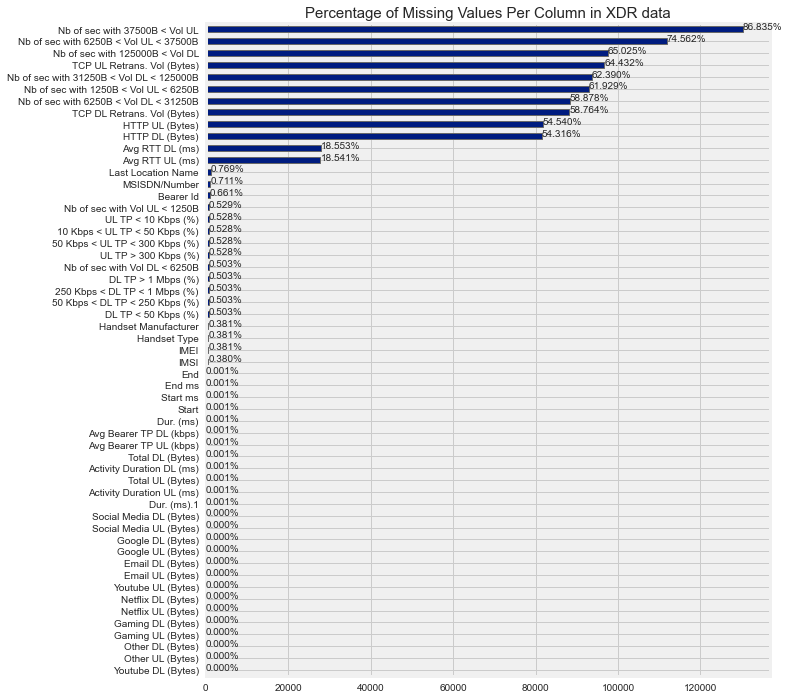

In [117]:
# Check the percentage of missing values in every column
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 12))
plt.title('Percentage of Missing Values Per Column in XDR data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

**Remove columns with >25% Missing values**

In [118]:
def removeMissingvalues(df:pd.DataFrame)-> pd.DataFrame:
    missing_ratio = df.isna().sum()/df.shape[0]

    # Below code gives list of columns having more than 25% nan
    col_to_drop = missing_ratio[missing_ratio>0.25].keys()

    df.drop(col_to_drop, axis=1,inplace=True)
    
    return df

In [119]:
df=removeMissingvalues(df)

In [120]:
# df.dropna(axis=0,subset=['Bearer Id'],inplace=True)
df.dropna(how='all',subset=['IMEI','IMSI','MSISDN/Number'],inplace=True)

In [121]:
df.shape

(149431, 45)

In [122]:
df.isna().sum()

Bearer Id                           430
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                       496
IMEI                                  2
Last Location Name                  592
Avg RTT DL (ms)                   27693
Avg RTT UL (ms)                   27675
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 724
50 Kbps < DL TP < 250 Kbps (%)      724
250 Kbps < DL TP < 1 Mbps (%)       724
DL TP > 1 Mbps (%)                  724
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [123]:
df.dtypes

Bearer Id                                 object
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                      object
MSISDN/Number                             object
IMEI                                      object
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [124]:
# separating columns based on datatypes
cols_numeric=df.columns.difference(['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name',
                                    'Handset Manufacturer','Handset Type']).to_list()
cols_cat=['Handset Manufacturer','Handset Type']

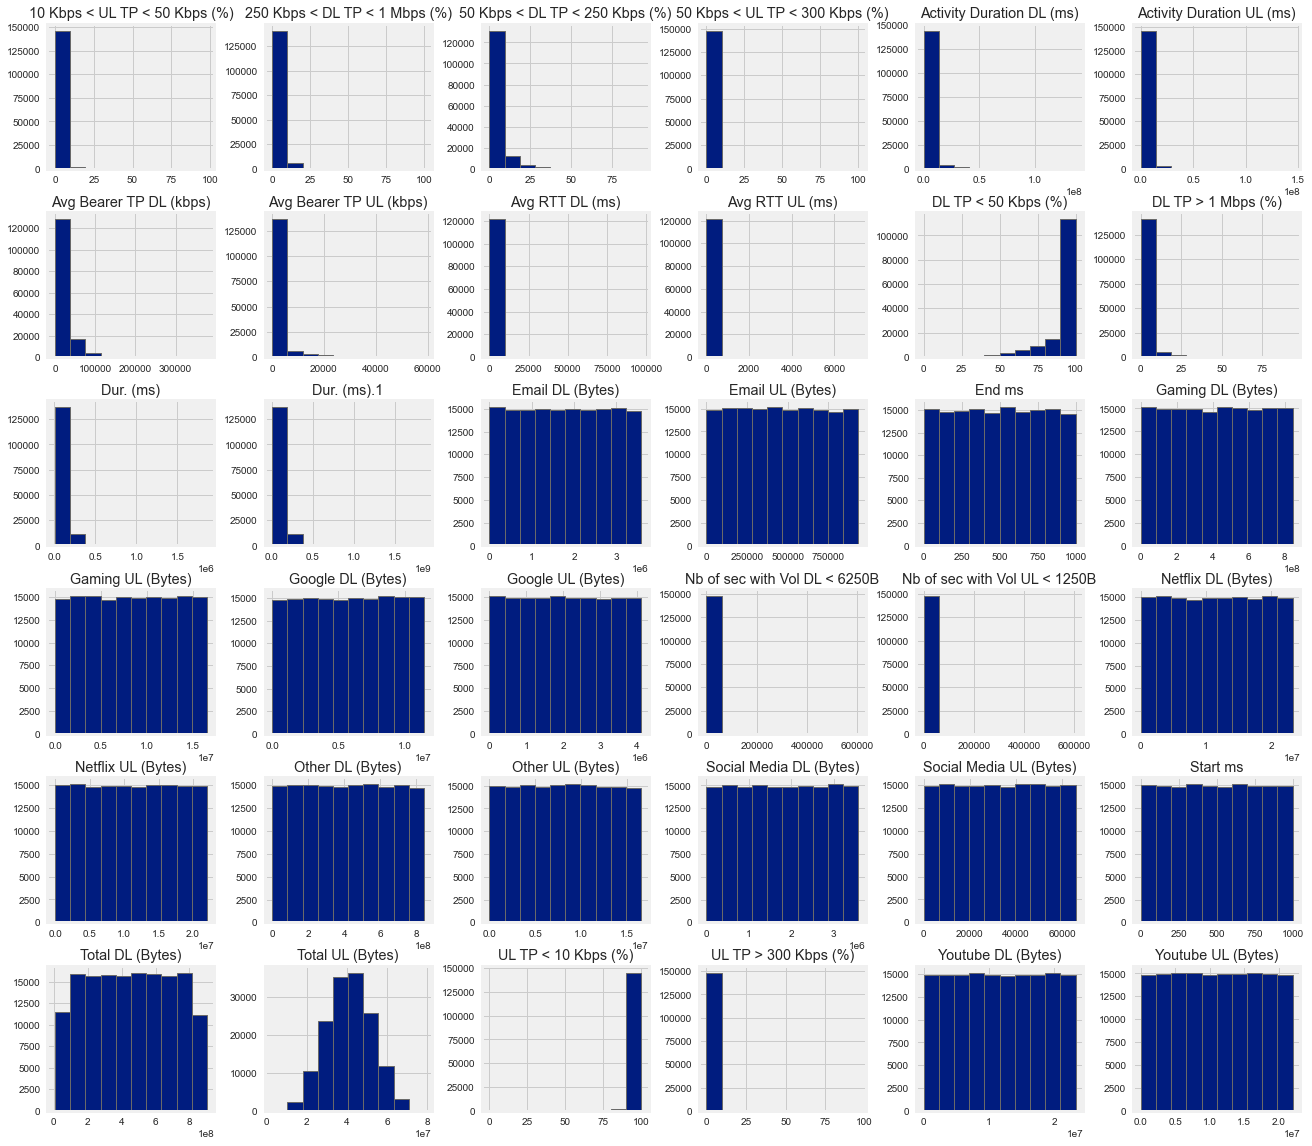

In [125]:
#Distribution of numeric variables
_=df[cols_numeric].hist(figsize=(20,20))

In [126]:
df=outlier_remove(df)

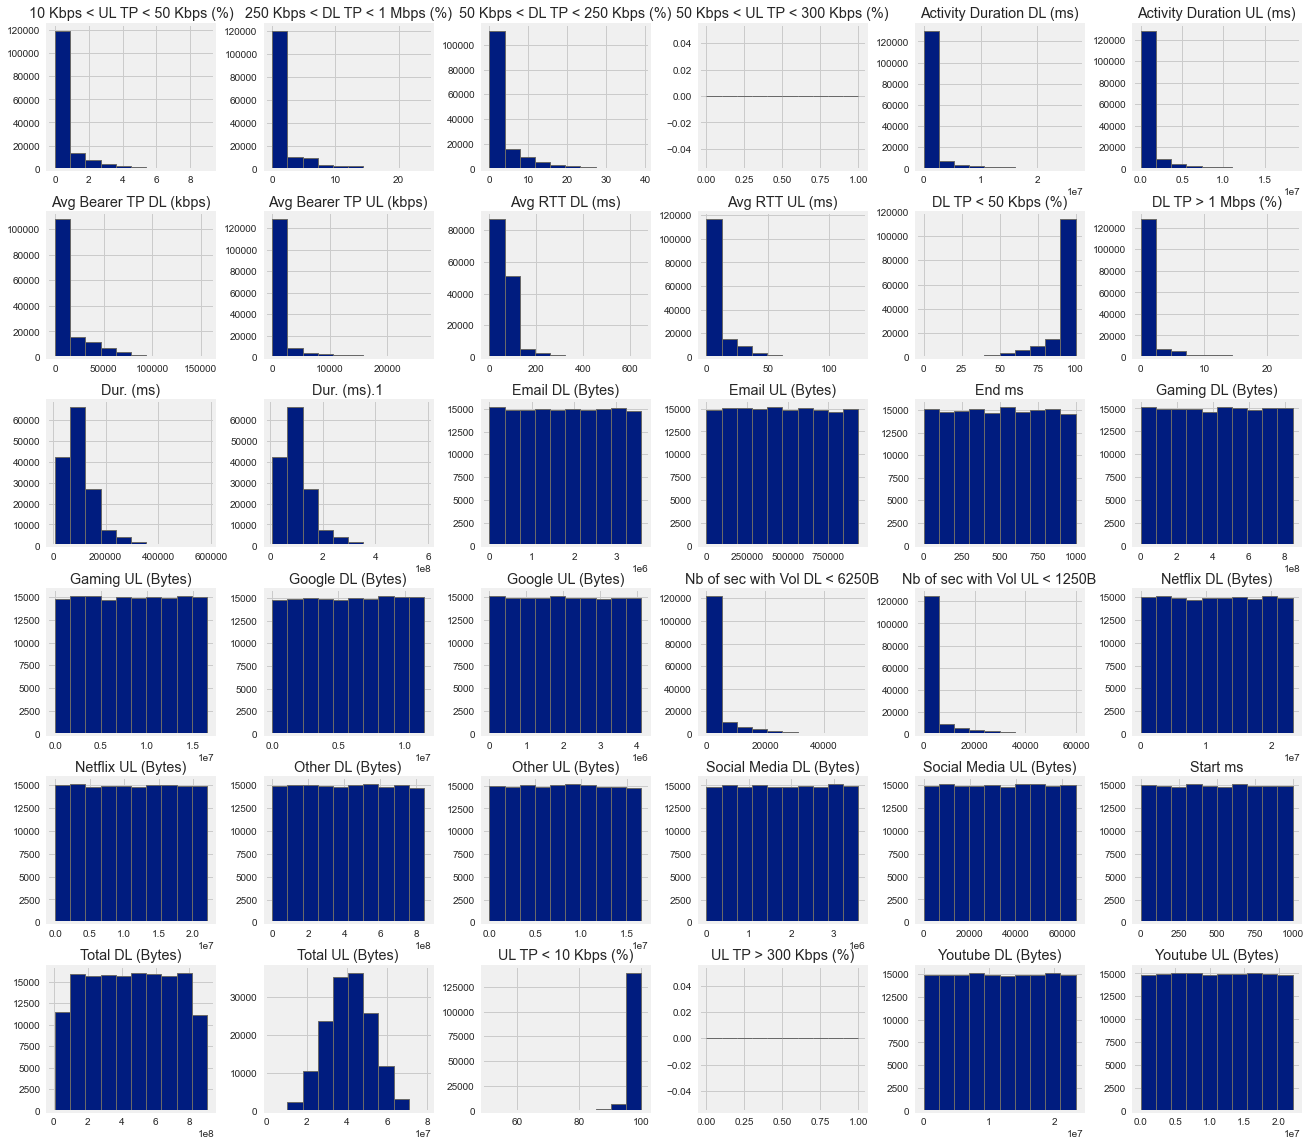

In [127]:
_=df[cols_numeric].hist(figsize=(20,20))

In [128]:
print('Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative


Start ms                          0.001031
End ms                           -0.000927
Dur. (ms)                         1.880406
Avg RTT DL (ms)                   4.320099
Avg RTT UL (ms)                   3.235096
Avg Bearer TP DL (kbps)           2.211565
Avg Bearer TP UL (kbps)           3.706645
DL TP < 50 Kbps (%)              -2.303325
50 Kbps < DL TP < 250 Kbps (%)    2.598542
250 Kbps < DL TP < 1 Mbps (%)     3.000316
DL TP > 1 Mbps (%)                3.690709
UL TP < 10 Kbps (%)              -6.447592
10 Kbps < UL TP < 50 Kbps (%)     3.663948
50 Kbps < UL TP < 300 Kbps (%)         NaN
UL TP > 300 Kbps (%)                   NaN
Activity Duration DL (ms)         3.936986
Activity Duration UL (ms)         3.891640
Dur. (ms).1                       1.880405
Nb of sec with Vol DL < 6250B     3.084690
Nb of sec with Vol UL < 1250B     3.313833
Social Media DL (Bytes)          -0.001955
Social Media UL (Bytes)          -0.000098
Google DL (Bytes)                -0.008221
Google UL (

In [129]:
#Filling in missing values using mean value or median value depending on the previous histogram and skeweness

for col in cols_numeric:
    if df[col].skew() >=1 or df[col].skew() <=-1:
        df[col]=df[col].fillna(df[col].median())
    else:
        df[col]=df[col].fillna(df[col].median())
        
df[cols_cat]=df[cols_cat].fillna('Undefined')

In [130]:
df.isna().sum()

Bearer Id                            430
Start                                  0
Start ms                               0
End                                    0
End ms                                 0
Dur. (ms)                              0
IMSI                                   0
MSISDN/Number                        496
IMEI                                   2
Last Location Name                   592
Avg RTT DL (ms)                        0
Avg RTT UL (ms)                        0
Avg Bearer TP DL (kbps)                0
Avg Bearer TP UL (kbps)                0
DL TP < 50 Kbps (%)                    0
50 Kbps < DL TP < 250 Kbps (%)         0
250 Kbps < DL TP < 1 Mbps (%)          0
DL TP > 1 Mbps (%)                     0
UL TP < 10 Kbps (%)                    0
10 Kbps < UL TP < 50 Kbps (%)          0
50 Kbps < UL TP < 300 Kbps (%)    149431
UL TP > 300 Kbps (%)              149431
Activity Duration DL (ms)              0
Activity Duration UL (ms)              0
Dur. (ms).1     

**Drop Duplicates**

In [131]:
df[df.duplicated(subset=['Bearer Id','IMSI','IMEI','MSISDN/Number'],keep=False)].sort_values(by='Bearer Id')
# df.drop_duplicates(subset=['Bearer Id','IMSI'],keep='first',inplace=True,ignore_index=True)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
81794,12682138000968900608,2019-04-27 09:26:13,116.0,2019-04-27 23:37:01,875.0,51048.0,208201007403043,33622869516,35333110267867,V88927C,...,2244218.0,4250329.0,17101361.0,10449531.0,584827028.0,15773257.0,592596827.0,156043.0,32884217.0,608776338.0
81897,12682138000968900608,2019-04-27 09:30:01,786.0,2019-04-27 23:36:29,156.0,50787.0,208201007403043,33622869516,35333110267867,U88927C,...,3761211.0,17609572.0,20656985.0,15850350.0,547186670.0,3921510.0,542559885.0,11852549.0,52804587.0,587678178.0
99728,12682138002839099392,2019-04-27 17:24:57,625.0,2019-04-28 00:33:43,446.0,25725.0,208201401935210,33637897214,35763109465111,C43005C,...,17670353.0,21172203.0,14608873.0,2144609.0,838141268.0,8738124.0,818849914.0,354168.0,36365256.0,883753031.0
99715,12682138002839099392,2019-04-27 17:24:42,9.0,2019-04-28 00:13:39,551.0,24537.0,208201401935210,33637897214,35763109465111,U42005C,...,12908809.0,17533466.0,13906096.0,10576110.0,839495888.0,13043898.0,378768071.0,5740481.0,47990966.0,879110687.0
659,13042425955376300032,2019-04-24 00:12:39,867.0,2019-04-25 00:12:39,919.0,86400.0,208201009424170,33621250040,35763109178011,T72389C,...,7586144.0,17382189.0,20681057.0,21212343.0,610072537.0,3776046.0,496643333.0,6244074.0,51293338.0,646771349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125206,7349883268069319680,2019-04-24 19:51:02,716.0,2019-04-30 13:00:30,441.0,493767.0,208201716367238,33786323068,35171510435028,D34374C,...,21158301.0,11037715.0,22357072.0,6884229.0,660071422.0,9221472.0,829603340.0,4707952.0,33650012.0,716267013.0
133104,7349883268069319680,2019-04-28 17:44:08,499.0,2019-04-30 13:00:30,441.0,155781.0,208201716367238,33786323068,35171510435028,D34374C,...,10533148.0,10646993.0,16301621.0,9259779.0,81489843.0,10298153.0,713405255.0,2879372.0,36448331.0,123401513.0
125305,7349883268069319680,2019-04-25 12:03:57,195.0,2019-04-30 13:00:30,441.0,435393.0,208201716367238,33786323068,35171510435028,D34374C,...,12932851.0,1730223.0,21925534.0,21394957.0,235235903.0,4599850.0,33597298.0,8003593.0,40393636.0,281847662.0
15713,NaN,2019-04-24 19:00:02,311.0,2019-04-24 23:40:22,766.0,16820.0,208201713791066,33659459218,86982702157001,NaN,...,11622328.0,16247567.0,18913010.0,13698018.0,821202931.0,9109950.0,502630612.0,16531160.0,58984370.0,863108241.0


In [132]:
df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('str',errors='ignore').str.capitalize()
df['Handset Type'] = df['Handset Type'].astype('str',errors='ignore').str.capitalize()

#### Top 10 handsets used by the customers and  Top 3 handset manufacturers

In [133]:
plt.style.use('seaborn-dark-palette')

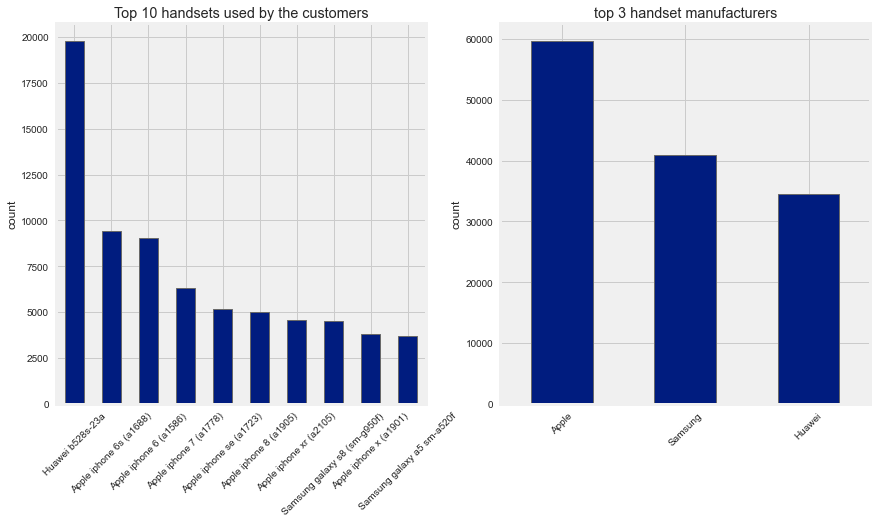

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
_ = df.query('`Handset Type`!="Undefined"')['Handset Type'].value_counts()[:10].plot(kind='bar', ylabel='count', rot=45,
                                                                                     ax=axs[0],
                                                                                     title='Top 10 handsets used by '
                                                                                           'the customers')
_ = df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3].plot(kind='bar',ylabel='count',rot=45,
                                                                            ax=axs[1],title='top 3 handset manufacturers')

#### top 5 handsets per top 3 handset manufacturer

In [137]:
df_manfact_goup=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung"\
                           or `Handset Manufacturer`=="Huawei"')

In [138]:
df_manfact_goup=df_manfact_goup.groupby(['Handset Manufacturer','Handset Type']).aggregate({'Handset Type':'count'})
pd.DataFrame(df_manfact_goup['Handset Type'].groupby('Handset Manufacturer',group_keys=False).nlargest(5))

Handset Type
Handset Manufacturer Handset Type                                
Apple                Apple iphone 6s (a1688)                 9419
                     Apple iphone 6 (a1586)                  9023
                     Apple iphone 7 (a1778)                  6326
                     Apple iphone se (a1723)                 5187
                     Apple iphone 8 (a1905)                  4993
Huawei               Huawei b528s-23a                       19752
                     Huawei e5180                            2079
                     Huawei p20 lite huawei nova 3e          2021
                     Huawei p20                              1480
                     Huawei y6 2018                           997
Samsung              Samsung galaxy s8 (sm-g950f)            4520
                     Samsung galaxy a5 sm-a520f              3724
                     Samsung galaxy j5 (sm-j530)             3696
                     Samsung galaxy j3 (sm-j330)             3484
                     Samsung galaxy s7 (sm-g930x)            3199

In [139]:
df.groupby('IMSI').aggregate({'Bearer Id':'count','Total UL (Bytes)':'sum',
                              'Total DL (Bytes)':'sum'}).sort_values(by='Bearer Id',ascending=False)

,Bearer Id,Total UL (Bytes),Total DL (Bytes)
IMSI,,,
208201402778052,18,669650721.0,7.301517e+09
208201715944176,17,689483001.0,8.156743e+09
208201007176097,17,729577380.0,7.770043e+09
208201906760163,16,624260321.0,7.081602e+09
208202100881019,15,703478581.0,7.811295e+09
...,...,...,...
208201545190143,0,45142931.0,5.873783e+08
208201907837163,0,20015468.0,3.292914e+07
208200802533205,0,24241141.0,3.792641e+08


In [140]:
df.groupby('IMSI').aggregate({'Bearer Id': 'count', 'Total UL (Bytes)': 'sum',
                              'Total DL (Bytes)': 'sum', 'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
                              'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum', 'Gaming DL (Bytes)': 'sum',
                              'Gaming UL (Bytes)': 'sum'}).sort_values(by='Bearer Id', ascending=False)

,Bearer Id,Total UL (Bytes),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
IMSI,,,,,,,,,
208201402778052,18,669650721.0,7.301517e+09,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0
208201715944176,17,689483001.0,8.156743e+09,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0
208201007176097,17,729577380.0,7.770043e+09,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0
208201906760163,16,624260321.0,7.081602e+09,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0
208202100881019,15,703478581.0,7.811295e+09,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0
...,...,...,...,...,...,...,...,...,...
208201545190143,0,45142931.0,5.873783e+08,15024089.0,5458119.0,15959307.0,21857833.0,5.498544e+08,10694649.0
208201907837163,0,20015468.0,3.292914e+07,11353620.0,5723417.0,5567228.0,8027681.0,4.613538e+06,1090631.0
208200802533205,0,24241141.0,3.792641e+08,3628081.0,2446340.0,19747414.0,10634569.0,3.514519e+08,3929212.0


In [141]:
df['MSISDN/Number'].value_counts()

33626320676    18
33625779332    17
33614892860    17
33659725664    16
33675877202    15
               ..
33666815393     1
33613402561     1
33613520327     1
33763273536     1
33659557666     1
Name: MSISDN/Number, Length: 106856, dtype: int64